In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # For reading raw ant data .csv

#### Make the vector matrix from raw data...
Get raw data from Google Drive https://drive.google.com/drive/folders/12Qg06rmIbLBOFpWW9I8Fx3Vhn4P2QHNm?usp=sharing (file too big for GitHub)

In [ ]:
# Input data & parameters
dataRaw = pd.read_csv(r'C:\Users\stpop\Documents\MATLAB\clean_616836\HRM_T1_resampled.txt',usecols=["id","alpha"])

In [34]:
turnLength = 10; # Set length of angle vectors (= 'curves')

nrOfTracks = 5; # Take data from this many tracks, since 15M pts would be a bit much?
# Inputs end

ids = np.unique(dataRaw.id)
ids = ids[0:nrOfTracks]
dataRaw = dataRaw.dropna(subset = ['alpha']) # Removes start & end points w/o angles

# Making matrix of turns
dataMat = np.zeros((turnLength,1));  # Seed for appending curves
for id in ids:  # We must avoid making curves that span 2 different tracks, thus loop over IDs
    alpha = dataRaw.alpha[dataRaw.id == id] # Angles of current id
    turn = np.zeros((turnLength,len(alpha)-turnLength)) # Preallocating
    for t in range(0,len(alpha)-turnLength): # Slide across track & make a turn at each t
        turn[:,t] = alpha[t:t+turnLength]

    dataMat = np.hstack((dataMat,turn))

np.delete(dataMat,0,1) # Removes seed
print(dataMat.shape)

(10, 11231)


#### ...or get some already saved curve data

In [ ]:
dataMat = np.loadtxt('clusterInput.txt', delimiter=',')
print(dataMat.shape)

In [32]:
# compute the singular value decomposition (SVD) of the data matrix

u, s, vh = np.linalg.svd(dataMat, full_matrices=True)

In [33]:
print(u.shape, s.shape, vh.shape)

(10, 10) (10,) (11231, 11231)


ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

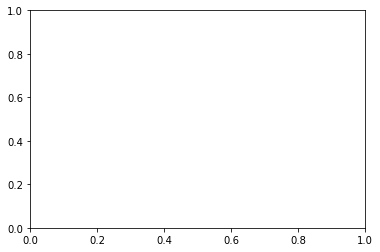

In [31]:
# plot the singular values

plt.plot([i+1 for i in range(10)], s, 'bx-')
plt.show()

In [22]:
# The function that takes an input the angles of the movement and returns the trajectories

def findTraj(allAngles):
    theta = np.cumsum(allAngles)
    dx = [0] + np.cos(theta)
    dy = [0] + np.sin(theta)
    xCoords = np.cumsum(dx)
    yCoords = np.cumsum(dy)
    return xCoords, yCoords

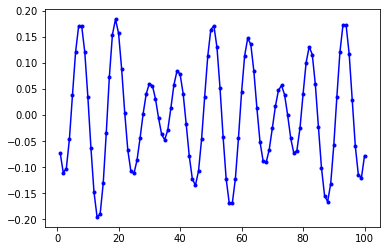

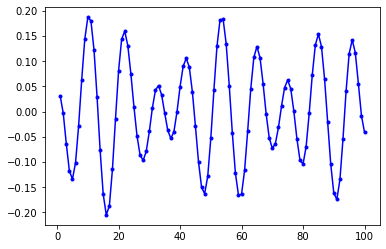

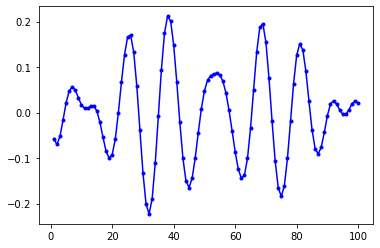

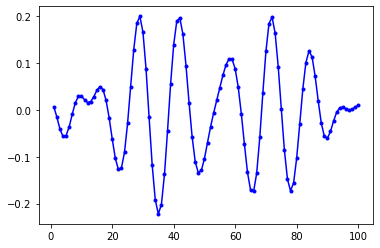

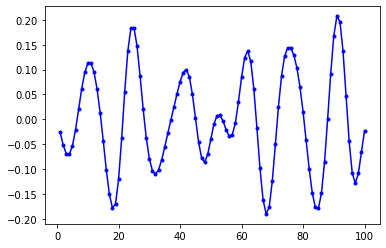

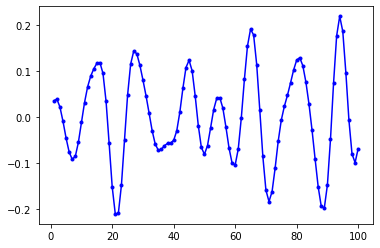

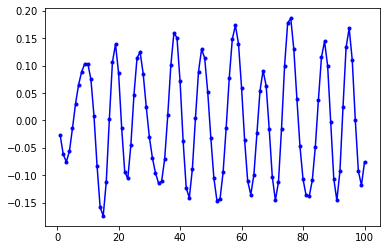

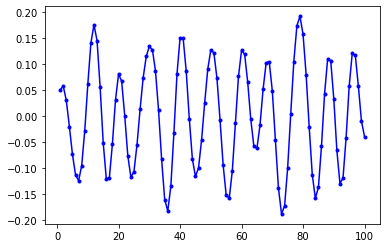

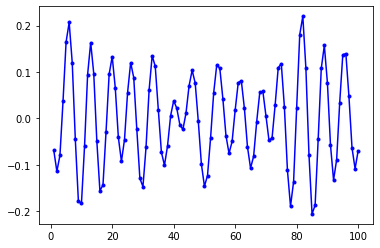

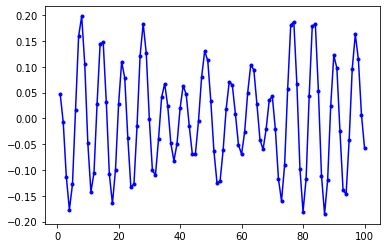

In [23]:
# Plot the trajectory angles corresponding to top 10 eigen directions

for ei in range(10):
    plt.plot([i+1 for i in range(turnLength)], u[:, ei], 'b.-')
    plt.show()

#     xCord, yCord = findTraj(np.radians(u[:, 0]))
#     plt.plot(xCord, yCord, 'b.-')
#     plt.show()

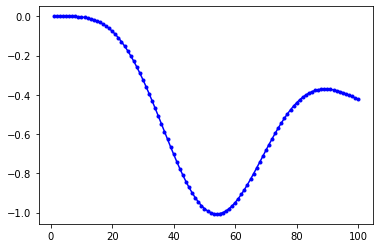

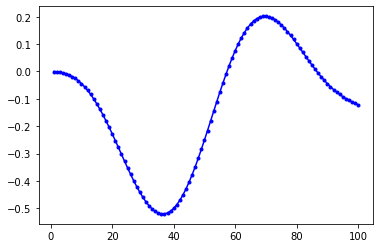

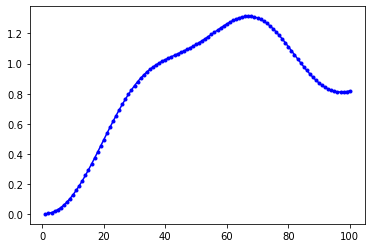

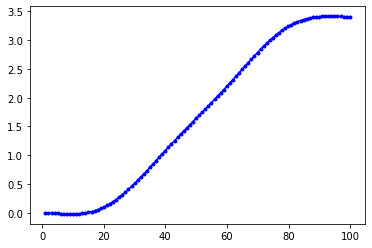

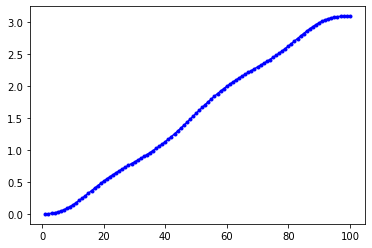

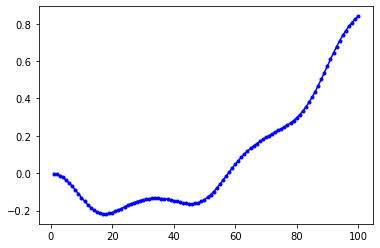

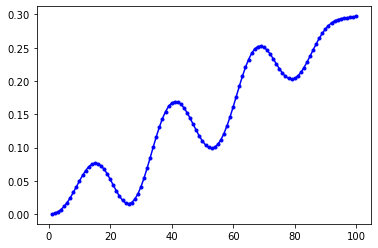

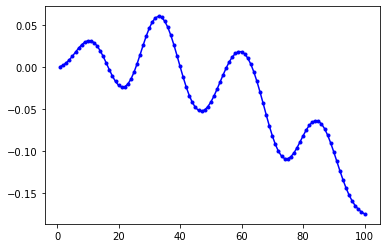

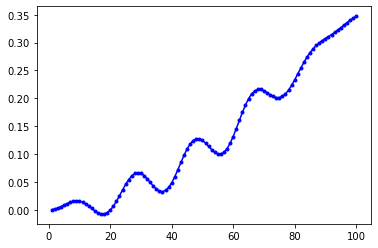

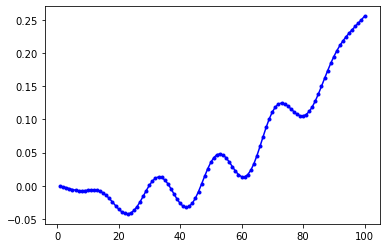

In [12]:
# Plot the trajectories corresponding to top 10 eigen directions

for ei in range(10):
    xCord, yCord = findTraj(np.radians(u[:, ei]))
    plt.plot(xCord, yCord, 'b.-')
    plt.show()

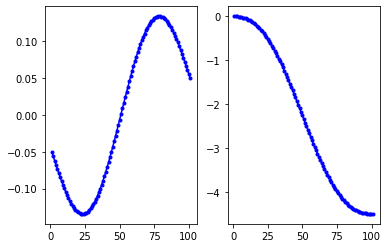

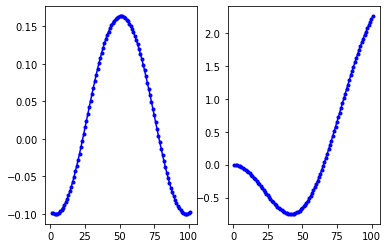

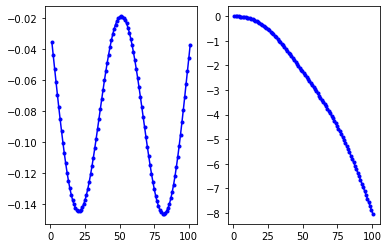

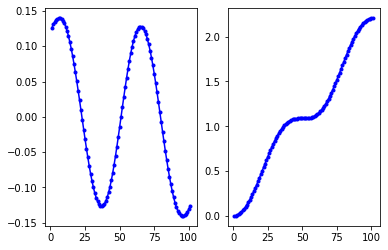

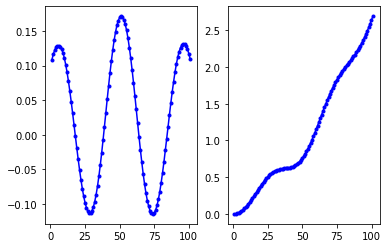

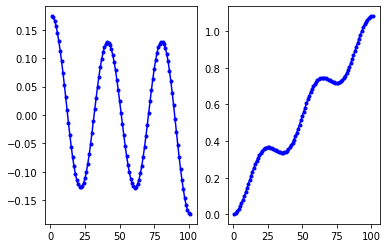

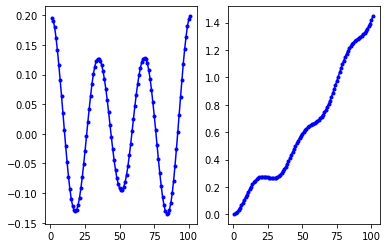

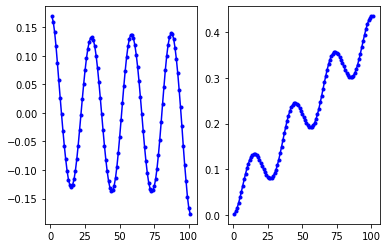

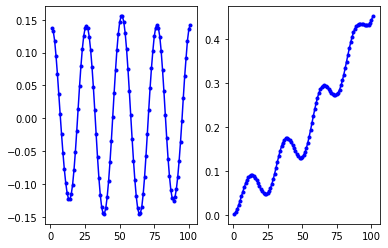

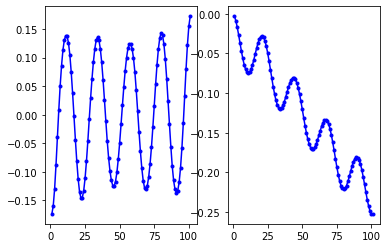

In [81]:
# Plot the trajectory angles and their corresopnding trajectories for the top 10 eigen directions

numbEig = 10
for ei in range(10):
    plt.subplot(1, 2, 1)
    plt.plot([i+1 for i in range(turnLength)], u[:, ei], 'b.-')

    plt.subplot(1, 2, 2)

    xCord, yCord = findTraj(np.radians(u[:, ei]))
    plt.plot(xCord, yCord, 'b.-')
    plt.show()

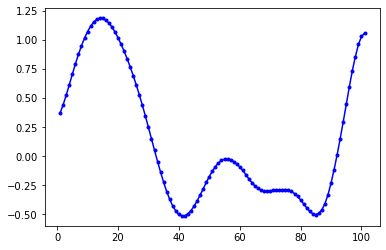

In [82]:
# Creating a random trajectory based on top 10 eigen angles/trajectories

newTraj_1 = [0 for _ in range(turnLength)]
for i in range(10):
    newTraj_1 += np.random.uniform(-0.1, 0.1) * (np.sqrt(s[i])) * u[:, i]
plt.plot([i+1 for i in range(turnLength)], newTraj_1, 'b.-')
plt.show()

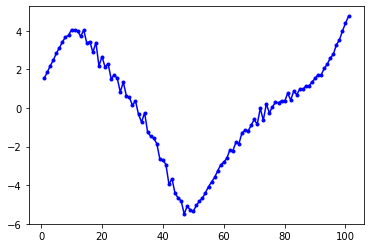

In [83]:
plt.plot([i+1 for i in range(turnLength)], dataMat[10, :], 'b.-')
plt.show()

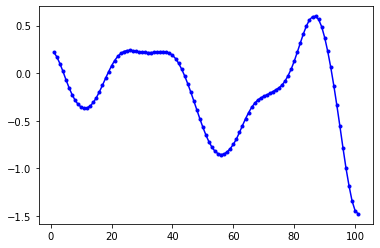

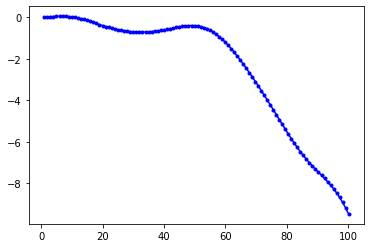

In [84]:
newTraj_1 = [0 for _ in range(turnLength)]
for i in range(10):
    newTraj_1 += np.random.uniform(-0.1, 0.1) * (np.sqrt(s[i])) * u[:, i]
    
plt.plot([i+1 for i in range(turnLength)], newTraj_1, 'b.-')
plt.show()

xCord, yCord = findTraj(np.radians(newTraj_1))
plt.plot(xCord, yCord, 'b.-')
plt.show()

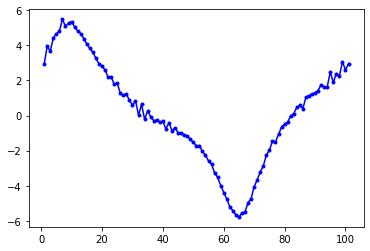

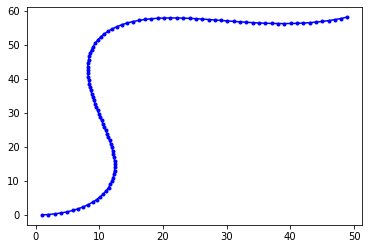

In [90]:
dataInd = 50
plt.plot([i+1 for i in range(turnLength)], dataMat[dataInd, :], 'b.-')
plt.show()

xCord, yCord = findTraj(np.radians(dataMat[dataInd, :]))
plt.plot(xCord, yCord, 'b.-')
plt.show()

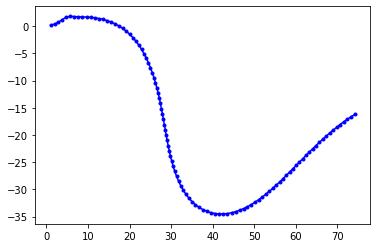

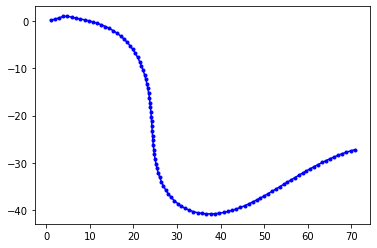

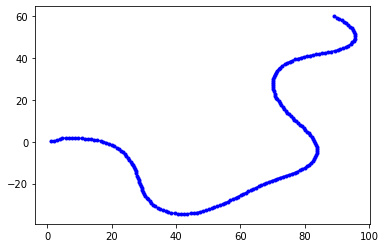

In [86]:
xCord, yCord = findTraj(np.radians(dataMat[0, :]))
plt.plot(xCord, yCord, 'b.-')
plt.show()
xCord, yCord = findTraj(np.radians(dataMat[1, :]))
plt.plot(xCord, yCord, 'b.-')
plt.show()
xCord, yCord = findTraj(np.radians(np.concatenate((dataMat[0, :], dataMat[100, :]), axis=0)))


plt.plot(xCord, yCord, 'b.-')
plt.show()

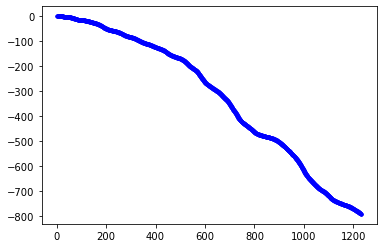

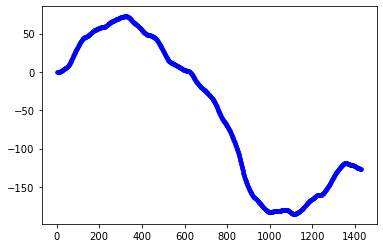

In [87]:
# Concatenate 15 randomly generated trajectories each of size 'turnLength' (100)

for it in range(2):
    combinedTraj = []
    for k in range(15):
        newTraj_1 = [0 for _ in range(turnLength)]
        for i in range(10):
            newTraj_1 += np.random.uniform(-0.1, 0.1) * (np.sqrt(s[i])) * u[:, i]
        combinedTraj = np.concatenate((combinedTraj, newTraj_1), axis=0)
    xCord, yCord = findTraj(np.radians(combinedTraj))
    plt.plot(xCord, yCord, 'b.-')
    plt.show()
    

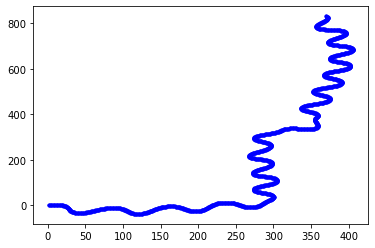

In [88]:
for it in range(1):
    combinedTraj = []
    for k in range(15):
        combinedTraj = np.concatenate((combinedTraj, dataMat[100 * it + k, :]), axis=0)
#         print(200 * it + k)
    xCord, yCord = findTraj(np.radians(combinedTraj))
    plt.plot(xCord, yCord, 'b.-')
    plt.show()